In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [4]:
# Let's see the number of rows and columns
print("Rows, columns: " + str(data.shape))

Rows, columns: (1599, 12)


In [5]:
# Let's look at the headers
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Missing Values
print(data.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
fig = px.histogram(data,x='quality')
fig.show()

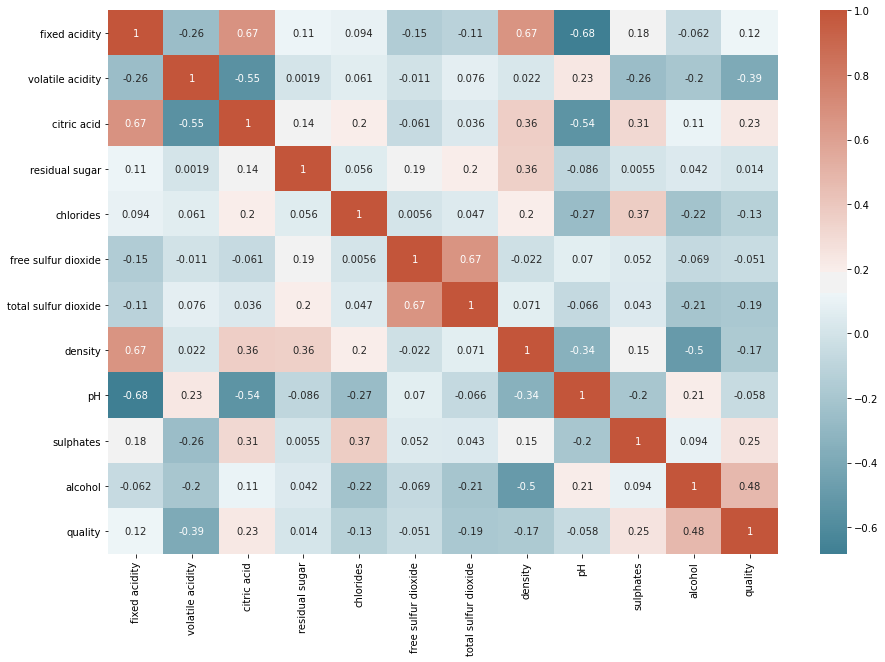

In [8]:
import matplotlib
import matplotlib.pyplot as plt
corr = data.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [9]:
# The correlation shows that some of our variables are very similar to each other, perhaps the most important components for us

In [10]:
# Create Classification version of target variable
data['goodquality'] = [1 if x >= 7 else 0 for x in data['quality']]
# Separate feature variables and target variable
X = data.drop(['quality','goodquality'], axis = 1)
y = data['goodquality']

In [11]:
# ratio of good and bad wines 
data['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [12]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [13]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [14]:
# Let's check the rest of the algorithms
# Importing Libraries
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn import metrics 

In [15]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest
print(classification_report(y_test, y_pred))
print("accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       355
           1       0.66      0.56      0.60        45

    accuracy                           0.92       400
   macro avg       0.80      0.76      0.78       400
weighted avg       0.91      0.92      0.91       400

accuracy: 0.9175


In [16]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian
print(classification_report(y_test, y_pred))
print("accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90       355
           1       0.37      0.76      0.50        45

    accuracy                           0.83       400
   macro avg       0.67      0.80      0.70       400
weighted avg       0.90      0.83      0.85       400

accuracy: 0.83


In [17]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron
print(classification_report(y_test, y_pred))
print("accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       355
           1       0.42      0.40      0.41        45

    accuracy                           0.87       400
   macro avg       0.67      0.66      0.67       400
weighted avg       0.87      0.87      0.87       400

accuracy: 0.87


In [18]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc
print(classification_report(y_test, y_pred))
print("accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       355
           1       0.58      0.31      0.41        45

    accuracy                           0.90       400
   macro avg       0.75      0.64      0.67       400
weighted avg       0.88      0.90      0.88       400

accuracy: 0.8975


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [19]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd
print(classification_report(y_test, y_pred))
print("accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       355
           1       0.34      0.44      0.39        45

    accuracy                           0.84       400
   macro avg       0.64      0.67      0.65       400
weighted avg       0.86      0.84      0.85       400

accuracy: 0.8425


In [20]:
# K Nearest Neighbor:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn
print(classification_report(y_test, y_pred))
print("accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       355
           1       0.53      0.58      0.55        45

    accuracy                           0.90       400
   macro avg       0.74      0.76      0.75       400
weighted avg       0.90      0.90      0.90       400

accuracy: 0.895


In [21]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc
print(classification_report(y_test, y_pred))
print("accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       355
           1       0.73      0.36      0.48        45

    accuracy                           0.91       400
   macro avg       0.83      0.67      0.71       400
weighted avg       0.90      0.91      0.90       400

accuracy: 0.9125


In [22]:
# XGBoost
import xgboost as xgb
XGB = xgb.XGBClassifier(random_state=1)
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
acc_XGB = round(XGB.score(X_train, y_train) * 100, 2)
acc_XGB
print(classification_report(y_test, y_pred))
print("accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       355
           1       0.62      0.69      0.65        45

    accuracy                           0.92       400
   macro avg       0.79      0.82      0.80       400
weighted avg       0.92      0.92      0.92       400

accuracy: 0.9175


In [23]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(random_state=1)
Ada.fit(X_train, y_train)
y_pred = Ada.predict(X_test)
acc_add = round(Ada.score(X_train, y_train) * 100, 2)
acc_add
print(classification_report(y_test, y_pred))
print("accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.51      0.49      0.50        45

    accuracy                           0.89       400
   macro avg       0.72      0.71      0.72       400
weighted avg       0.89      0.89      0.89       400

accuracy: 0.89


In [24]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
GradBoost = GradientBoostingClassifier(random_state=1)
GradBoost.fit(X_train, y_train)
y_pred = GradBoost.predict(X_test)
acc_GradBoost = round(GradBoost.score(X_train, y_train) * 100, 2)
acc_GradBoost
print(classification_report(y_test, y_pred))
print("accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.52      0.51      0.52        45

    accuracy                           0.89       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.89      0.89      0.89       400

accuracy: 0.8925


In [25]:
# Linear discriminant analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_clf = round(clf.score(X_train, y_train) * 100, 2)
acc_clf
print(classification_report(y_test, y_pred))
print("accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       355
           1       0.45      0.42      0.44        45

    accuracy                           0.88       400
   macro avg       0.69      0.68      0.68       400
weighted avg       0.87      0.88      0.88       400

accuracy: 0.8775


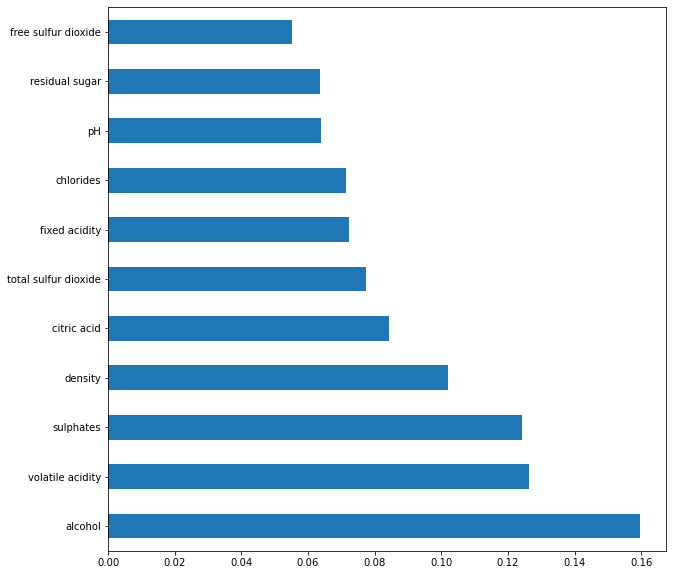

In [26]:
# Now let's build graphs
# Random Forest
feat_importances = pd.Series(random_forest.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

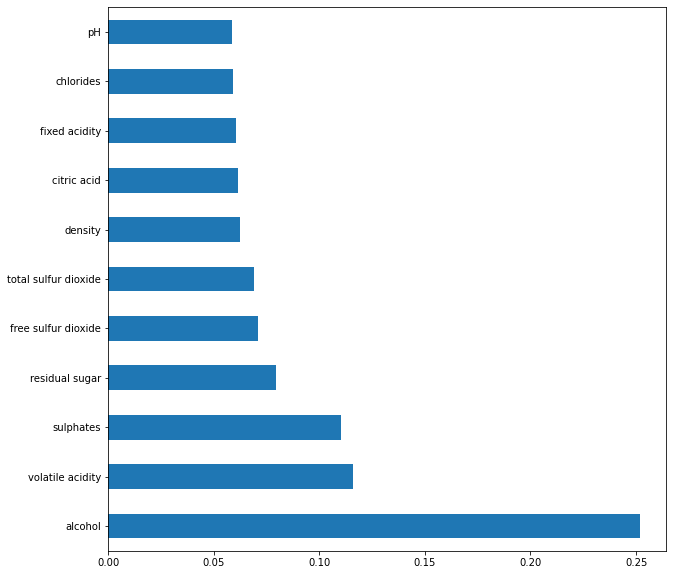

In [27]:
# XGBoost
feat_importances = pd.Series(XGB.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

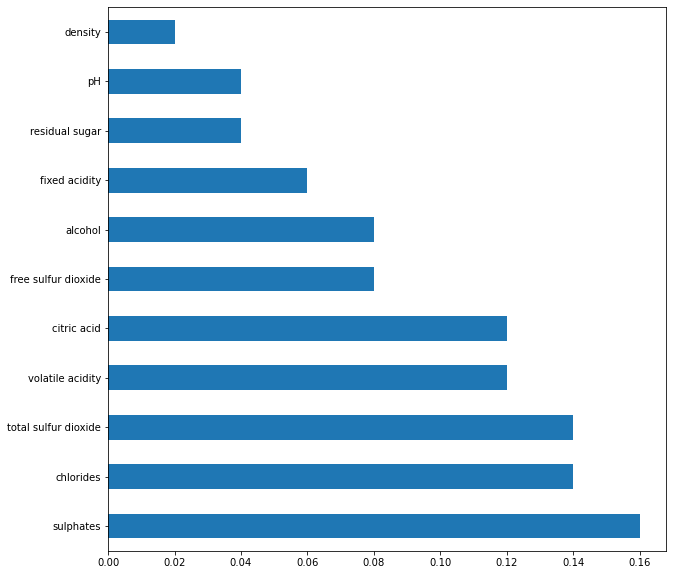

In [28]:
# AdaBoost
feat_importances = pd.Series(Ada.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [29]:
result = pd.DataFrame({
    'MODEL': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest','Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent','XGBoost', 'AdaBoost','Gradient Boosting', 'Linear discriminant analysis (LDA)'],
    'SCORE': [acc_linear_svc, acc_knn, acc_sgd,acc_random_forest, 
              acc_gaussian, acc_perceptron, 
              acc_sgd, acc_add, acc_XGB, acc_GradBoost, acc_clf]})
result = result.sort_values(by='SCORE', ascending=False)
result = result.set_index('SCORE')
result.head(11)

,MODEL
SCORE,
100.00,Random Forest
100.00,AdaBoost
96.75,Gradient Boosting
92.99,KNN
91.08,XGBoost
87.57,Support Vector Machines
87.32,Linear discriminant analysis (LDA)
85.15,Logistic Regression
85.15,Stochastic Gradient Decent
